# Yelp Data Challenge - Data Preprocessing

### Flora Li

### Goal

1. Read data from file and load to Pandas DataFrame
2. Filter data by city, category and date
3. Join business and review data on "business_id"
4. Exploratory data analysis(EDA) on numeric and categorical variables from final data

### Dataset Introduction


Yelp Dataset Challenge

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses

    1.1M business attributes, e.g., hours, parking availability, ambience.

    Aggregated check-ins over time for each of the 125K businesses

    200,000 pictures from the included businesses



Cities:

    U.K.: Edinburgh

    Germany: Karlsruhe

    Canada: Montreal and Waterloo

    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland



Files:

    yelp_academic_dataset_business.json

    yelp_academic_dataset_checkin.json

    yelp_academic_dataset_review.json

    yelp_academic_dataset_tip.json

    yelp_academic_dataset_user.json

## Read data from file and load to Pandas DataFrame

In [1]:
import json
import pandas as pd

In [2]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'yelp_dataset/business.json',
    'yelp_dataset/checkin.json',
    'yelp_dataset/review.json',
    'yelp_dataset/tip.json',
    'yelp_dataset/user.json'
]



### Business Data

In [3]:
# Open file
f=open(file_business)
first_line = f.readline()                  #read json file into string type(original type)
first_line_json = json.loads(first_line)   #read the json file into a dictionary
print type(first_line)
print first_line
print type(first_line_json)
print first_line_json

<type 'str'>
{"business_id": "YDf95gJZaq05wvo7hTQbbQ", "name": "Richmond Town Square", "neighborhood": "", "address": "691 Richmond Rd", "city": "Richmond Heights", "state": "OH", "postal_code": "44143", "latitude": 41.5417162, "longitude": -81.4931165, "stars": 2.0, "review_count": 17, "is_open": 1, "attributes": {"RestaurantsPriceRange2": 2, "BusinessParking": {"garage": false, "street": false, "validated": false, "lot": true, "valet": false}, "BikeParking": true, "WheelchairAccessible": true}, "categories": ["Shopping", "Shopping Centers"], "hours": {"Monday": "10:00-21:00", "Tuesday": "10:00-21:00", "Friday": "10:00-21:00", "Wednesday": "10:00-21:00", "Thursday": "10:00-21:00", "Sunday": "11:00-18:00", "Saturday": "10:00-21:00"}}

<type 'dict'>
{u'city': u'Richmond Heights', u'neighborhood': u'', u'name': u'Richmond Town Square', u'business_id': u'YDf95gJZaq05wvo7hTQbbQ', u'longitude': -81.4931165, u'hours': {u'Monday': u'10:00-21:00', u'Tuesday': u'10:00-21:00', u'Friday': u'10:00

In [4]:
from time import time       #used to calculate the time cost to open the file
t_start = time()
t0=time()

with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)
    
t1=time()
print "loading business data cost {0:.4f}s". format(t1-t0)

loading business data cost 9.1600s


In [5]:
df_business.head(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{u'RestaurantsPriceRange2': 2, u'BusinessParki...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{u'Monday': u'10:00-21:00', u'Tuesday': u'10:0...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{u'GoodForMeal': {u'dessert': False, u'latenig...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{u'Monday': u'10:00-22:00', u'Tuesday': u'10:0...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{u'BusinessParking': {u'garage': False, u'stre...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{u'Monday': u'10:00-19:00', u'Tuesday': u'10:0...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{u'Tuesday': u'9:00-17:00', u'Friday': u'9:00-...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{u'GoodForMeal': {u'dessert': False, u'latenig...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


In [7]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      156639 non-null object
business_id     156639 non-null object
categories      156639 non-null object
city            156639 non-null object
hours           156639 non-null object
is_open         156639 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156639 non-null object
neighborhood    156639 non-null object
postal_code     156639 non-null object
review_count    156639 non-null int64
stars           156639 non-null float64
state           156639 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 17.9+ MB


We can see that the business file contains 157k observations with 15 features.

In [8]:
df_business.describe()

,is_open,latitude,longitude,review_count,stars
count,156639.000000,156638.000000,156638.000000,156639.000000,156639.000000
mean,0.844375,38.585033,-92.856485,30.238159,3.647154
std,0.362501,5.399871,26.557741,96.486631,0.977640
min,0.000000,-36.086009,-142.466650,3.000000,1.000000
25%,1.000000,33.627161,-112.138207,4.000000,3.000000
50%,1.000000,36.142381,-89.523198,9.000000,3.500000
75%,1.000000,43.596845,-79.668760,23.000000,4.500000
max,1.000000,89.999314,115.086769,6979.000000,5.000000


### Checkin Data

In [9]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)

In [10]:
df_checkin.head(5)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{u'Monday': {u'19:00': 1, u'14:00': 1, u'12:00..."
1,kREVIrSBbtqBhIYkTccQUg,"{u'Sunday': {u'19:00': 1}, u'Saturday': {u'16:..."
2,tJRDll5yqpZwehenzE2cSg,"{u'Thursday': {u'0:00': 1}, u'Saturday': {u'16..."
3,nhZ1HGWD8lMErdn3FuWuTQ,"{u'Monday': {u'19:00': 1, u'21:00': 1, u'17:00..."
4,vDoXZGE7p6xAkKQ0XQPvoA,"{u'Saturday': {u'23:00': 1}, u'Thursday': {u'1..."


In [11]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135148 entries, 0 to 135147
Data columns (total 2 columns):
business_id    135148 non-null object
time           135148 non-null object
dtypes: object(2)
memory usage: 2.1+ MB


The data in checkin file contains 135k observations with 2 features.

### Review Data

In [18]:
from time import time       
t_start = time()
t0=time()

with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)

t1=time()
print "loading review data cost {0:.4f}s". format(t1-t0)

loading review data cost 758.2090s


In [13]:
df_review.head(5)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw


In [14]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736897 entries, 0 to 4736896
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 325.3+ MB


The review data contains 4.7 million observations with 9 features.

### Tip Data

In [15]:
with open(file_tip) as f:
   df_tip = pd.DataFrame(json.loads(line) for line in f)

In [29]:
df_tip.head(2)

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg


In [16]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028802 entries, 0 to 1028801
Data columns (total 5 columns):
business_id    1028802 non-null object
date           1028802 non-null object
likes          1028802 non-null int64
text           1028802 non-null object
user_id        1028802 non-null object
dtypes: int64(1), object(4)
memory usage: 39.2+ MB


The tip dataset contains 1.03 million observations with 5 features.

### User Data

In [ ]:
#with open(file_user) as f:
#    df_user = pd.DataFrame(json.loads(line) for line in f)

In [ ]:
#df_user.head(2)

In [ ]:
#df_user.info()

## Filter data by city and category

#### Create filters/masks

create filters that selects business

1. that are located in "Las Vegas"

2. that contains "Restaurants" in their category (You may need to filter null categories first)

In [6]:
# summary of city column
df_business.city.describe()

count        156639
unique         1010
top       Las Vegas
freq          24768
Name: city, dtype: object

We can see that there are 1010 unique values for city, and the most common value is Las Vegas.

In [7]:
# Create Pandas DataFrame filters

# city Las Vegas bool
cond_city = df_business['city'].isin(["Las Vegas","las vegas"])

# isnull bool
cond_category_not_null = ~df_business["categories"].isnull()

# restaurant in categories
# first, apply(str) convert categories to strings,
# then check if it contains Restaurants 
cond_category_restaurant = df_business["categories"].apply(str).str.contains("Restaurants|Restaurant|restaurants|restaurant")

In [8]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business[cond_city & cond_category_not_null & cond_category_restaurant]

In [9]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5687 entries, 58 to 156635
Data columns (total 15 columns):
address         5687 non-null object
attributes      5687 non-null object
business_id     5687 non-null object
categories      5687 non-null object
city            5687 non-null object
hours           5687 non-null object
is_open         5687 non-null int64
latitude        5687 non-null float64
longitude       5687 non-null float64
name            5687 non-null object
neighborhood    5687 non-null object
postal_code     5687 non-null object
review_count    5687 non-null int64
stars           5687 non-null float64
state           5687 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 710.9+ KB


We can see that there are 5687 observations in Los Vegas with restaurants as the categories and is not null.

In [10]:
# check if there are city columns with lower capital "las vegas"
df_filtered[df_filtered.city == "las vegas"]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
64912,3981 E Sunset Rd,"{u'GoodForMeal': {u'dessert': False, u'latenig...",t3AWGr757V4Fvcun6sDsuw,"[Sandwiches, Restaurants]",las vegas,"{u'Monday': u'10:00-20:00', u'Tuesday': u'10:0...",1,36.070760,-115.088329,Capriotti's Sandwich Shop,,89120,53,3.5,NV
132099,3199 E Warm Springs Rd,{},DpxYFBHeje5UU-m2i6_KTg,"[Restaurants, Sandwiches]",las vegas,{},0,36.056199,-115.105022,Eat 'em Sandwiches,,89120,3,2.5,NV


#### Keep relevant columns

only keep some useful columns

business_id

name

categories

stars
   

In [11]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [12]:
# Make a DataFrame that contains only the above mentioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [13]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns = {"stars":"avg_stars"}, inplace=True) 

C:\Users\Flora\Anaconda\envs\python27\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Here, inplace is a boolean, default False, means whether to return a new DataFrame. If True then value of copy is ignored.

In [14]:
# Inspect your DataFrame
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5687 entries, 58 to 156635
Data columns (total 4 columns):
business_id    5687 non-null object
name           5687 non-null object
categories     5687 non-null object
avg_stars      5687 non-null float64
dtypes: float64(1), object(3)
memory usage: 222.1+ KB


In [15]:
df_selected_business.head()

,business_id,name,categories,avg_stars
58,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"[Restaurants, American (Traditional), Mexican,...",3.0
64,QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"[Mexican, Restaurants]",3.5
90,DiA78qPtp6rfRNdomzjBbw,Joshan Filipino Oriental Market,"[Chinese, Food, Convenience Stores, Restaurants]",3.5
107,YTqtM2WFhcMZGeAGA08Cfg,Mariscos Playa Escondida,"[Seafood, Restaurants, Specialty Food, Ethnic ...",4.5
116,Oto60yDwk1z72WmfWEYrjg,Baja Miguel's,"[Food, Restaurants, Mexican]",3.0


#### Save results to csv files

In [17]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv('selected_business.csv', index=False, encoding="utf-8")

In [18]:
# Try reload the csv file to check if everything works fine
pd.read_csv('selected_business.csv',encoding='utf-8').head()

,business_id,name,categories,avg_stars
0,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"[Restaurants, American (Traditional), Mexican,...",3.0
1,QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"[Mexican, Restaurants]",3.5
2,DiA78qPtp6rfRNdomzjBbw,Joshan Filipino Oriental Market,"[Chinese, Food, Convenience Stores, Restaurants]",3.5
3,YTqtM2WFhcMZGeAGA08Cfg,Mariscos Playa Escondida,"[Seafood, Restaurants, Specialty Food, Ethnic ...",4.5
4,Oto60yDwk1z72WmfWEYrjg,Baja Miguel's,"[Food, Restaurants, Mexican]",3.0


### Use the "business_id" column to filter review data¶

We want to make a DataFrame that contains and only contains the reviews about the business entities we just obtained

#### Load review dataset

I have already load the review dataset before, so check the head of df_review.

In [19]:
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA


#### Prepare dataframes to be joined, - on business_id

In [16]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index("business_id")

In [19]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index("business_id")

#### Join! and reset index

In [22]:
# Join df_left and df_right. What type of join?
# It should be inner join
df_joined = df_left.join(df_right, how="inner")

In [23]:
# You may want to reset the index 
df_joined.reset_index(inplace=True)

In [24]:
df_joined.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2011-03-31,0,3PjT8n8rpkwLRuObXLmm3w,2,We went in with high hopes after a friend reco...,0,96aWRa-gy1RrsrFQURagvg


#### We further filter data by date, e.g. keep comments from last 2 years

Otherwise your laptop may crush on memory when running machine learning algorithms

Purposefully ignoring the reviews made too long time ago

In [25]:
# Make a filter that selects date after 2015-09-01
cond_last_2_years = df_joined['date'] > u'2015-09-01'

In [26]:
# Filter the joined DataFrame and name it as df_final
df_final = df_joined[cond_last_2_years]

#### Take a glance at the final dataset

In [27]:
# Count missing values by column
df_final.isnull().sum()

business_id    0
name           0
categories     0
avg_stars      0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
dtype: int64

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338573 entries, 0 to 849888
Data columns (total 12 columns):
business_id    338573 non-null object
name           338573 non-null object
categories     338573 non-null object
avg_stars      338573 non-null float64
cool           338573 non-null int64
date           338573 non-null object
funny          338573 non-null int64
review_id      338573 non-null object
stars          338573 non-null int64
text           338573 non-null object
useful         338573 non-null int64
user_id        338573 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 33.6+ MB


In [29]:
import matplotlib.pyplot as plt

% matplotlib inline

#### Categorical variables

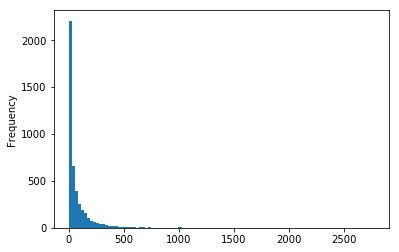

In [30]:
# calculate counts of reviews per business entity, and plot it
df_final["business_id"].value_counts().plot.hist(bins = 100)
plt.show()

We can see that most of the restaurants have 0 reveiws or few reviews.

In [31]:
# name
df_final["name"].value_counts().head(5)

Gangnam Asian BBQ Dining    2771
Hash House A Go Go          2701
Bacchanal Buffet            2602
Gordon Ramsay BurGR         2080
Shake Shack                 1915
Name: name, dtype: int64

In [32]:
df_final["name"].describe()

count                       338573
unique                        3059
top       Gangnam Asian BBQ Dining
freq                          2771
Name: name, dtype: object

The most frequent name in the business dataset is Gangnam Asian BBQ Dining.

In [33]:
# categories
df_final["categories"].describe()

count                     338573
unique                      2892
top       [Restaurants, Mexican]
freq                        4883
Name: categories, dtype: object

The most common business category is Restaurants, Mexican.

In [34]:
# user_id
df_final["user_id"].describe()

count                     338573
unique                    160590
top       bLbSNkLggFnqwNNzzq-Ijw
freq                         456
Name: user_id, dtype: object

#### Numeric variables

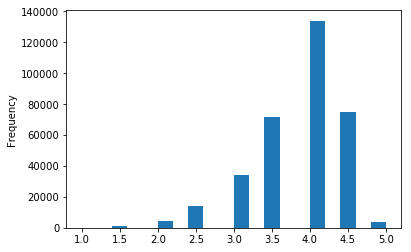

In [35]:
df_final['avg_stars'].plot.hist(bins = 20)
plt.show()

The plot shows that most of the restaurants get an average star of 4, followed by 3.5 and 4.5. Very bad and very good are both few.

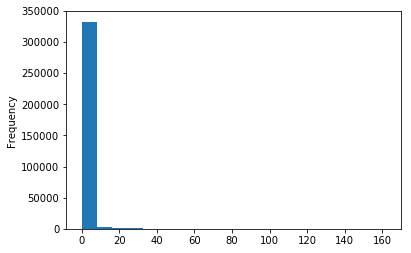

In [36]:
df_final['useful'].plot.hist(bins = 20)
plt.show()

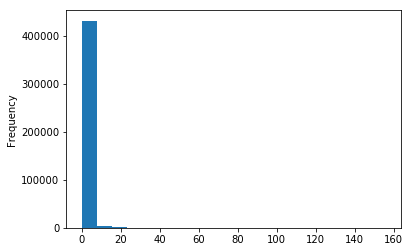

In [114]:
df_final['cool'].plot.hist(bins = 20)
plt.show()

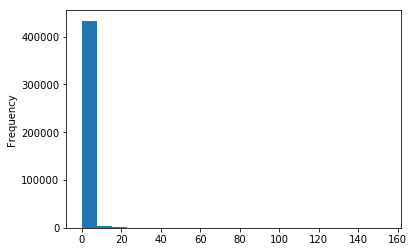

In [108]:
df_final['funny'].plot.hist(bins = 20)
plt.show()

The reviews mentioned 'cool','funny','useful' are few.

### Save your preprocessed dataset to csv file

In [37]:
# Save to last_2_years_restaurant_reviews.csv for your next task
df_final.to_csv('last_2_years_restaurant_reviews1.csv', index=False, encoding='utf-8')